In [1]:
import pandas as pd
import numpy as np
import binet as bnt

/home/miglesia/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Or from file if you have it.
wt = pd.read_csv('./../../data/wt/wt.csv')
wt = wt.loc[(wt.year > 2005) & (wt.year < 2014)]
pr = pd.read_csv('./../../data/wt/pr.csv')
co = pd.read_csv('./../../data/wt/co.csv')

In [3]:
wt_fra = wt.loc[wt.ccode == 'fra']

In [4]:
df = pd.read_csv('./../../data/processed/CN_ID_4_FY.csv')
df = df.loc[df.IMPORT == 0]
df = df.rename(columns = {'YEAR': 'year'})

In [5]:
fl_fra = df.groupby(['year', 'CN ID 4'])['VART'].sum().reset_index()

In [6]:
prods_wt = wt_fra.groupby(['year','pcode'])['x'].sum().sort_values(ascending = False).reset_index()
prods_fl = fl_fra.groupby(['year','CN ID 4'])['VART'].sum().sort_values(ascending = False).reset_index()


In [7]:
merged = prods_wt.merge(prods_fl, left_on = ['pcode', 'year'], right_on = ['CN ID 4', 'year'], how = 'outer')

merged = merged.dropna()
merged = merged.set_index(['year', 'pcode'])
df = pd.DataFrame(merged.x/merged.VART, columns=['ratio'])

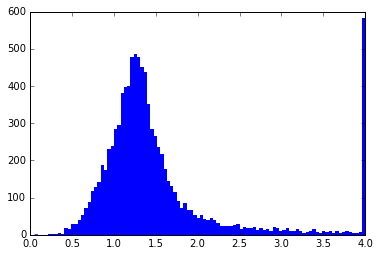

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist((merged.x/merged.VART).clip(0, 4), 100, lw = 0)
plt.show()

In [9]:
df.unstack().T.round(2).sample(20).dropna()

year          2006  2007  2008  2009  2010  2011  2012  2013
      pcode                                                 
ratio 4303.0  1.07  1.12  1.17  1.12  1.16  1.15  1.08  1.15
      1506.0  1.16  1.38  1.29  1.07  0.93  0.93  0.82  1.05
      2846.0  1.17  1.25  1.40  1.69  1.93  1.24  1.32  1.43
      8709.0  0.96  1.28  1.58  1.60  1.36  1.64  1.27  1.46
      6206.0  1.21  1.31  1.40  1.32  1.22  1.26  1.12  1.16
      2203.0  0.64  0.72  0.80  0.80  0.82  0.87  0.86  0.95
      206.0   3.50  4.77  1.55  1.26  1.17  1.22  1.09  1.18
      7411.0  2.66  1.48  1.83  1.65  1.66  1.37  1.29  1.26
      8307.0  1.10  1.28  1.32  1.32  1.08  1.21  0.78  0.62
      6909.0  0.69  0.82  1.08  0.90  0.73  1.18  1.15  1.21
      5209.0  1.11  1.26  1.47  1.42  1.30  1.39  1.18  1.35
      4823.0  2.91  1.23  1.24  1.20  1.14  1.20  3.71  3.49
      404.0   0.38  0.44  0.52  0.52  0.50  0.52  0.46  0.46
      7011.0  1.63  1.47  1.74  1.53  1.36  1.49  1.71  1.30
      7003.0  1.73  2.00  2.09  2.53  1.35  1.48  1.41  1.25
      2829.0  0.70  0.81  0.50  0.57  0.47  0.49  0.54  0.54
      1514.0  1.18  1.33  1.57  1.44  1.40  1.36  1.35  1.50
      3302.0  1.05  1.14  1.20  1.14  1.09  1.12  1.08  1.17
      4822.0  1.27  1.51  1.83  1.93  1.48  1.49  1.34  1.39
      4406.0  1.16  1.32  1.42  1.31  1.35  1.49  1.25  1.46